In [1]:
from __future__ import print_function, division
%matplotlib inline
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import sys
from scipy import stats
from fiona.crs import from_epsg

In [2]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,10)

#### 1.traffic

In [3]:
df = pd.read_csv("zip_traffic_counts.csv")
dftraf = df.iloc[:, 2:4]
dftraf.rename(columns={'Zip Code': 'zip_code',
                       'Count': 'traffic'}, inplace=True)
dftraf['zip_code'] = dftraf['zip_code'].astype(int)
dftraf['traffic'] = dftraf['traffic'] / 1e4
dftraf.head()

,zip_code,traffic
0,11436,0.747437
1,11213,1.486010
2,11212,1.163750
3,11225,1.026300
4,11218,0.919088


In [4]:
dftraf.shape

(263, 2)

In [5]:
dftraf.dtypes

zip_code      int64
traffic     float64
dtype: object

In [6]:
dftraf.describe()

,zip_code,traffic
count,263.000000,263.000000
mean,10629.174905,0.991602
std,874.151510,1.015465
min,83.000000,0.000000
25%,10113.500000,0.000000
50%,10459.000000,0.943464
75%,11234.500000,1.535992
max,11697.000000,10.332400


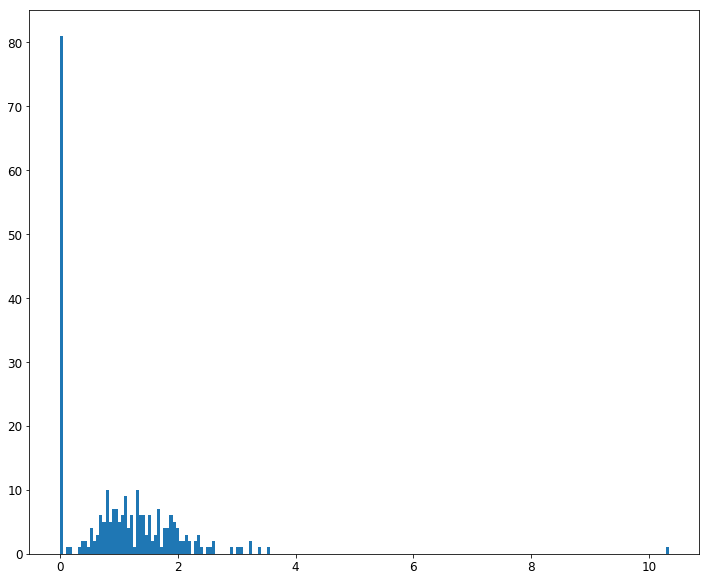

In [7]:
plt.hist(dftraf['traffic'], bins=200)
plt.show()

In [8]:
dftraf.sort_values(by='traffic', ascending=False, inplace=True)
dftraf.head()

,zip_code,traffic
196,10075,10.332400
127,11239,3.537750
125,11430,3.391286
21,10034,3.238600
81,10017,3.207457


In [9]:
#cut off the outliers
dftraf = dftraf[dftraf['traffic']<9]

#### 2. GHG

In [10]:
df = pd.read_csv("ghg_zip.csv")
dfghg = df.iloc[:, 1:]
dfghg.rename(columns={'Postcode': 'zip_code',
                       'Total GHG Emissions(MtCO2e)': 'GHG'}, inplace=True)
dfghg['zip_code'] = dfghg['zip_code'].astype(int)
dfghg['GHG'] = dfghg['GHG'] / 1e2
dfghg.head()

,zip_code,GHG
0,10001,8.287515
1,10002,10.906622
2,10003,9.272508
3,10004,19.637542
4,10005,18.238200


In [11]:
dfghg.shape

(183, 2)

In [12]:
dfghg.dtypes

zip_code      int64
GHG         float64
dtype: object

#### 3. boiler

In [13]:
df = pd.read_csv("boiler_estimate_cosumption_2015_byzipcode.csv")
dfboil = df.iloc[:, 1:3]
dfboil.rename(columns={'total_consumption_gallons': 'boiler'}, inplace=True)
dfboil['zip_code'] = dfboil['zip_code'].astype(int)
dfboil['boiler'] = dfboil['boiler'] / 1e6
dfboil.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,zip_code,boiler
0,10001,12.352480
1,10002,1.850799
2,10003,9.808501
3,10004,1.081638
4,10005,0.085200


In [14]:
dfboil.shape

(157, 2)

#### 4. construction

In [15]:
df = pd.read_csv("DOB_impact_2015_byzipcode.csv")
dfcons = df.iloc[:, 1:]
dfcons.rename(columns={'total_impact_days': 'construction'}, inplace=True)
dfcons['zip_code'] = dfcons['zip_code'].astype(int)
dfcons['construction'] = dfcons['construction'] / 1e5
dfcons.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,zip_code,construction
0,0,0.00041
1,10000,0.00878
2,10001,15.26615
3,10002,8.31002
4,10003,13.38875


In [16]:
dfcons.shape

(222, 2)

#### 5. pm25

In [17]:
df = pd.read_csv("pm25_2015_byzipcode.csv")
dfpm = df.iloc[:, 1:]
dfpm.rename(columns={'ZIP Codes': 'zip_code',
                     'total_impact_days': 'construction'}, inplace=True)
dfpm['zip_code'] = dfpm['zip_code'].astype(int)
dfpm.head()

,zip_code,pm
0,10453,9.7
1,10457,9.7
2,10460,9.7
3,10458,9.1
4,10467,9.1


In [18]:
dfpm.shape

(178, 2)

### Merge

In [19]:
df = pd.merge(dftraf, dfghg, on='zip_code').drop_duplicates('zip_code')
df = pd.merge(df, dfboil, on='zip_code').drop_duplicates('zip_code')
df = pd.merge(df, dfcons, on='zip_code').drop_duplicates('zip_code')
df = pd.merge(df, dfpm, on='zip_code').drop_duplicates('zip_code')
df.head()

,zip_code,traffic,GHG,boiler,construction,pm
0,10034,3.238600,5.843254,8.135459,1.84321,9.4
1,10017,3.207457,15.110683,5.828683,10.36213,11.7
2,10009,3.061214,7.629542,0.668625,6.21836,10.1
3,10475,3.047788,8.099875,0.149358,1.56980,9.1
4,10011,2.921608,7.716256,10.009715,16.54263,11.4


In [20]:
df.shape

(147, 6)

In [21]:
df['traffic_square'] = df.traffic * df.traffic
df.head()

,zip_code,traffic,GHG,boiler,construction,pm,traffic_square
0,10034,3.238600,5.843254,8.135459,1.84321,9.4,10.488530
1,10017,3.207457,15.110683,5.828683,10.36213,11.7,10.287781
2,10009,3.061214,7.629542,0.668625,6.21836,10.1,9.371033
3,10475,3.047788,8.099875,0.149358,1.56980,9.1,9.289009
4,10011,2.921608,7.716256,10.009715,16.54263,11.4,8.535792


In [22]:
#pm
p_m = np.mean(df['pm'])

In [23]:
p_s = np.std(df['pm'])

In [24]:
#construction
c_m = np.mean(df['construction'])

In [25]:
c_s = np.std(df['construction'])

In [26]:
con = 1
pmv = 0.162

In [27]:
con_real = (con * c_s + c_m) * 1e5
con_real

854660.74968345452

In [28]:
pmv_real = (pmv * p_s + p_m)
pmv_real

9.3779827916280727

In [29]:
con_real / 3650

234.15363005026151

In [30]:
pmv_real / 10

0.93779827916280722

In [31]:
for x in df.columns[1:]:
    df[x] = (df[x]-np.mean(df[x]))/np.std(df[x])

In [33]:
df.describe()

,zip_code,traffic,GHG,boiler,construction,pm,traffic_square
count,147.000000,1.470000e+02,1.470000e+02,147.000000,1.470000e+02,1.470000e+02,1.470000e+02
mean,10756.061224,4.350262e-16,-1.419877e-16,0.000000,-1.450087e-16,-8.217161e-16,-1.450087e-16
std,566.500701,1.003419e+00,1.003419e+00,1.003419,1.003419e+00,1.003419e+00,1.003419e+00
min,10001.000000,-2.154838e+00,-1.596192e+00,-0.719618,-1.140201e+00,-1.929201e+00,-1.120767e+00
25%,10042.000000,-6.835390e-01,-6.934269e-01,-0.665455,-6.567604e-01,-8.222040e-01,-6.908521e-01
50%,11101.000000,-9.380647e-02,-3.208206e-01,-0.449684,-3.580785e-01,-1.711499e-02,-2.771421e-01
75%,11236.000000,6.448075e-01,5.072546e-01,0.254869,3.873730e-01,5.867018e-01,4.358909e-01
max,11435.000000,2.890238e+00,3.680233e+00,4.478271,3.206700e+00,2.498788e+00,3.934167e+00


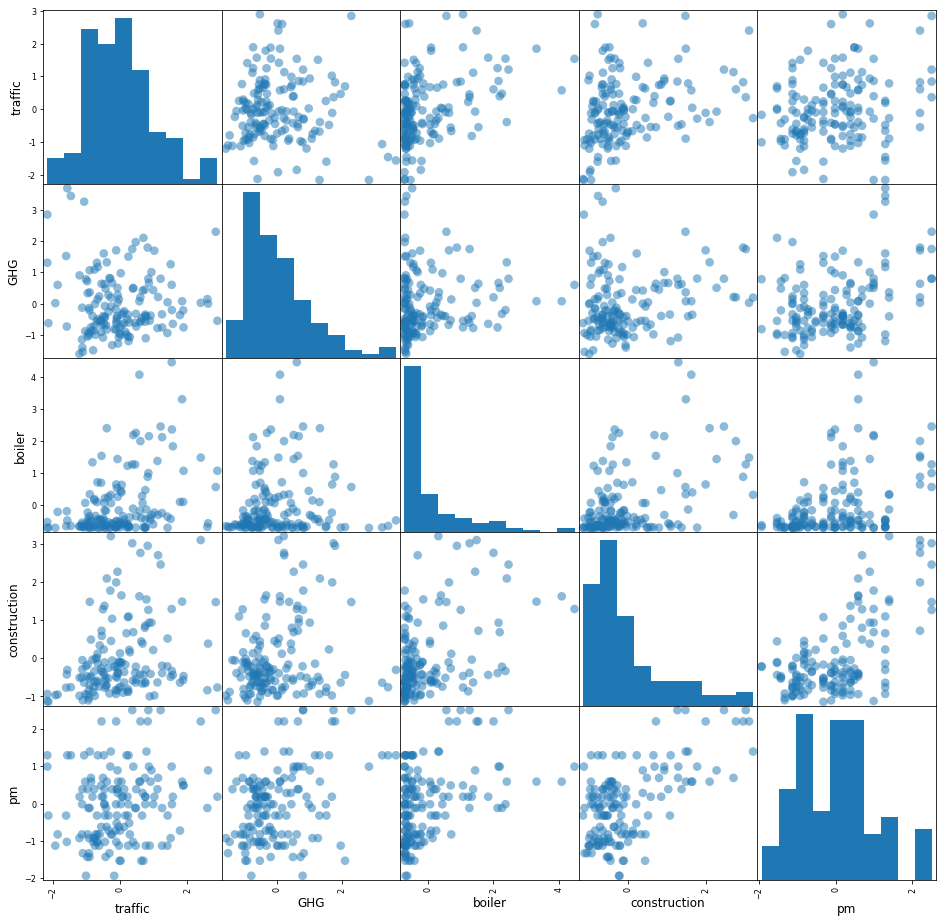

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix (df.iloc[:, 1:-1], s=300, figsize=(16, 16))
plt.savefig("scatter_matrix", dpi=300, transparent=True)
plt.show()

In [35]:
df.iloc[:, 1:-1].corr()

,traffic,GHG,boiler,construction,pm
traffic,1.000000,-0.050510,0.394257,0.311007,0.223622
GHG,-0.050510,1.000000,0.094475,0.193270,0.379774
boiler,0.394257,0.094475,1.000000,0.449864,0.425042
construction,0.311007,0.193270,0.449864,1.000000,0.615641
pm,0.223622,0.379774,0.425042,0.615641,1.000000


In [71]:
df_ = df.iloc[:, :-2]

#### PCA

In [40]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

In [41]:
data1 = df.iloc[:, 1:-2]
data1.head()

,traffic,GHG,boiler,construction
0,2.890238,-0.540985,1.072069,-0.763984
1,2.841724,2.294960,0.563143,1.477751
2,2.613907,0.005641,-0.575281,0.387327
3,2.592991,0.149569,-0.689843,-0.835931
4,2.396429,0.032177,1.485571,3.104135


[ 0.44968439  0.26310763  0.15445785  0.13275014]


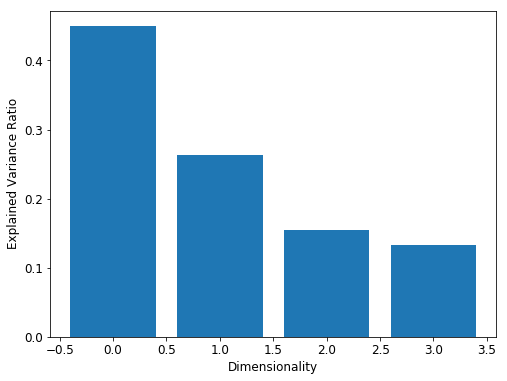

In [53]:
n=4
pca = PCA(n)
Xproj = pca.fit_transform(data1)
eigenvalues = pca.explained_variance_ratio_
print (pca.explained_variance_ratio_)
plt.figure(2, figsize=(8, 6))
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [54]:
pca.explained_variance_ratio_

array([ 0.44968439,  0.26310763,  0.15445785,  0.13275014])

In [55]:
pca.components_

array([[ 0.51344176,  0.17999649,  0.60319842,  0.58320707],
       [-0.41638127,  0.89015705, -0.07484333,  0.16924993],
       [ 0.71502711,  0.41223625, -0.23547546, -0.51317524],
       [-0.22746525,  0.072684  ,  0.75835444, -0.60652712]])

In [56]:
components_explanation = pd.DataFrame(pca.components_,columns = data1.columns)
components_explanation

,traffic,GHG,boiler,construction
0,0.513442,0.179996,0.603198,0.583207
1,-0.416381,0.890157,-0.074843,0.169250
2,0.715027,0.412236,-0.235475,-0.513175
3,-0.227465,0.072684,0.758354,-0.606527


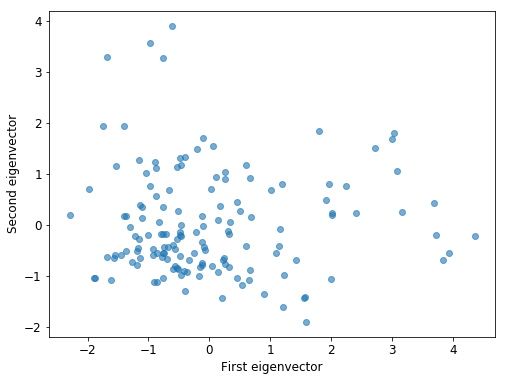

In [57]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(Xproj[:, 0], Xproj[:, 1], cmap=plt.cm.cool, alpha=0.6)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()

In [58]:
n=3 # number of clusters
dd=data1 #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)
# print res.predict(dd)

[1 2 1 1 2 1 1 2 1 2 2 2 0 1 1 2 1 2 2 1 0 1 2 1 1 2 2 2 2 1 1 2 1 1 0 1 1
 1 2 1 2 1 2 0 1 2 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 1 1 1 1 0 1 2 0 0 1 1 2 1 1 0 1 1 1 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0]


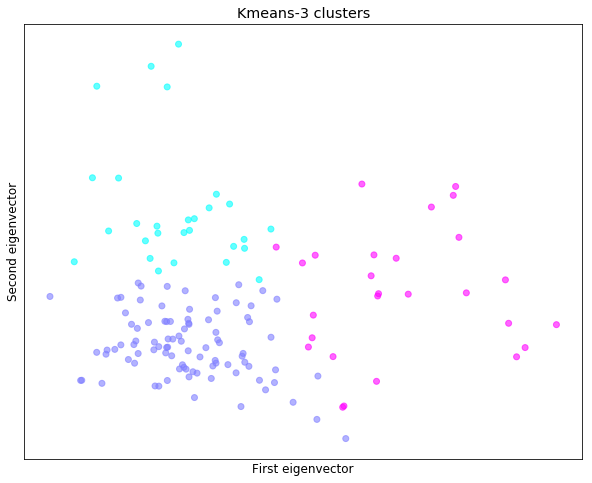

In [59]:
X = data1
Y = res.labels_
plt.figure(figsize=(10,8))
plt.clf()
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=res.labels_, 
            cmap=plt.cm.cool, alpha=0.6)
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()

In [60]:
res.labels_

array([1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

In [64]:
y_cluster = pd.Series(res.labels_)

In [65]:
y_true = df.iloc[:, -1]

In [72]:
dfnew = pd.concat([df_, y_cluster], axis=1)
dfnew.columns = ['zip_code','traffic','GHG','boiler','construction','cluster']
dfnew.head()

,zip_code,traffic,GHG,boiler,construction,cluster
0,10034,2.890238,-0.540985,1.072069,-0.763984,1
1,10017,2.841724,2.294960,0.563143,1.477751,2
2,10009,2.613907,0.005641,-0.575281,0.387327,1
3,10475,2.592991,0.149569,-0.689843,-0.835931,1
4,10011,2.396429,0.032177,1.485571,3.104135,2


In [74]:
dfnew.to_csv('cluster.csv')

In [49]:
data2 = data1[['GHG', 'construction']]

[ 0.59663504  0.40336496]


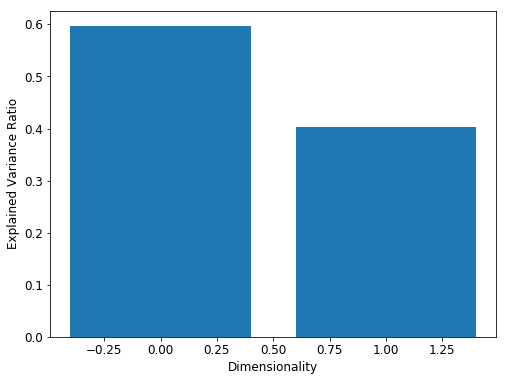

In [50]:
n=2
pca = PCA(n)
Xproj = pca.fit_transform(data2)
eigenvalues = pca.explained_variance_ratio_
print (pca.explained_variance_ratio_)
plt.figure(2, figsize=(8, 6))
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [51]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

## Regression

#### We assign alpha=0.05

In [36]:
#model 1
lm1 = smf.ols('pm ~ traffic + traffic_square + GHG + boiler + construction', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 04 Dec 2017   Prob (F-statistic):           1.27e-19
Time:                        20:06:25   Log-Likelihood:                -157.91
No. Observations:                 147   AIC:                             327.8
Df Residuals:                     141   BIC:                             345.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7.958e-16      0.060  -1.33e-14      1.000      -0.118       0.118
traffic           -0.5063      0.224     -2.261      0.025      -0.949      -0.064
traffic_square     0.5368      0.219      2.456      0.015       0.105       0.969
GHG                0.2292      0.064      3.599      0.000       0.103       0.355
boiler             0.1701      0.070      2.424      0.017       0.031       0.309
construction       0.5156      0.071      7.297      0.000       0.376       0.655
==============================================================================
Omnibus:                        2.279   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.685
Skew:                          -0.049   Prob(JB):                        0.431
Kurtosis:                       2.485   Cond. No.                         8.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#model 2
lm2 = smf.ols('pm ~ GHG + boiler + construction', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     43.37
Date:                Mon, 04 Dec 2017   Prob (F-statistic):           5.40e-20
Time:                        20:06:25   Log-Likelihood:                -161.03
No. Observations:                 147   AIC:                             330.1
Df Residuals:                     143   BIC:                             342.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.958e-16      0.061  -1.32e-14      1.000      -0.120       0.120
GHG              0.2695      0.062      4.369      0.000       0.148       0.391
boiler           0.1831      0.068      2.703      0.008       0.049       0.317
construction     0.4812      0.069      6.999      0.000       0.345       0.617
==============================================================================
Omnibus:                        2.473   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.854
Skew:                          -0.094   Prob(JB):                        0.396
Kurtosis:                       2.483   Cond. No.                         1.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
LRresult = lm1.compare_lr_test(lm2)
print ('The likelihood ratio test result: p-value = {:.3f}'.format(LRresult[1]))
print ('We can not reject the Null hypothsis. We think the model 1 is not better than model 2.')

The likelihood ratio test result: p-value = 0.044
We can not reject the Null hypothsis. We think the model 1 is not better than model 2.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


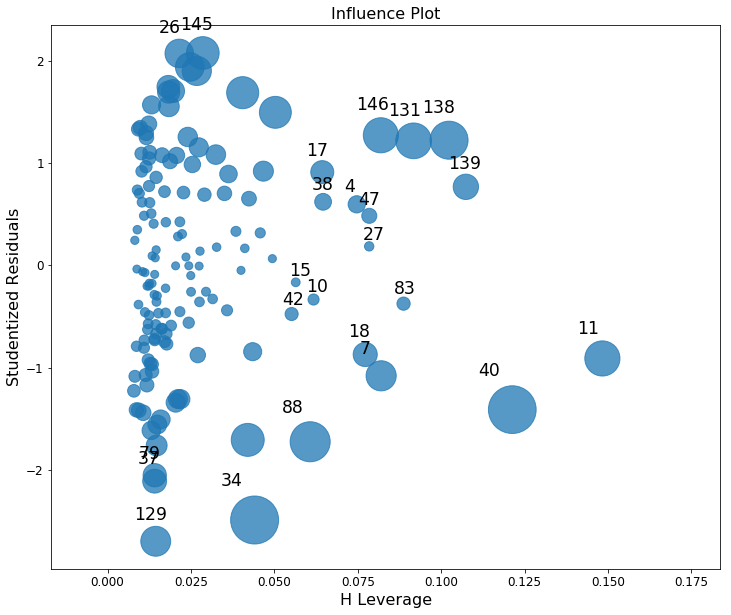

Figure . The influence plot. Cook's distance is used to estimate the influence of data points.


In [39]:
import statsmodels.api as sm
sm.graphics.influence_plot(lm2, alpha  = 0.05, criterion="cooks")
plt.show()
print ("\033[1mFigure . The influence plot.\033[0m Cook's distance is used to estimate " +
       "the influence of data points.")